In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from keras.datasets import mnist
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier

In [2]:
def generate_binary_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

In [3]:
def plot_separator(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, label="support vectors", facecolors='none', edgecolors='k')

In [4]:
def plot_binary(data, svc=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=data.target, label="data", s=30, cmap=plt.cm.Paired)
    
    if svc:
        plot_separator(svc)
    
    plt.grid()
    plt.legend()

In [5]:
dataset = generate_binary_dataset(-4, 4, 500, lambda x, y: x - y > 1)
dataset.head()

x         y  target
0 -0.721806 -1.923277     1.0
1 -2.929571  0.392074    -1.0
2 -1.483103 -3.441287     1.0
3 -0.789479 -3.847159     1.0
4 -1.193797  1.557751    -1.0

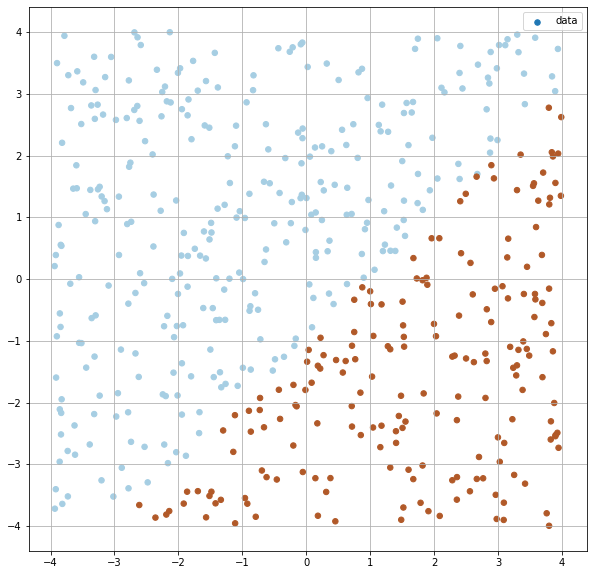

In [6]:
plot_binary(dataset)

In [7]:
model = SVC(kernel="linear")

In [8]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

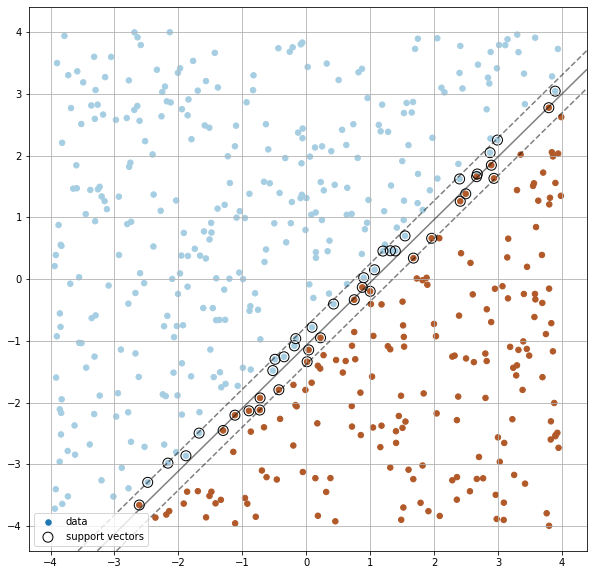

In [9]:
plot_binary(dataset, model)

In [15]:
dataset = generate_binary_dataset(-2, 2, 2000, lambda x, y: x ** 2 + y ** 2 < 1)
dataset.head()

x         y  target
0  0.727319  1.816410    -1.0
1 -1.978555 -1.161331    -1.0
2  1.838592 -0.537376    -1.0
3 -1.378294  1.806649    -1.0
4  1.918944 -0.865445    -1.0

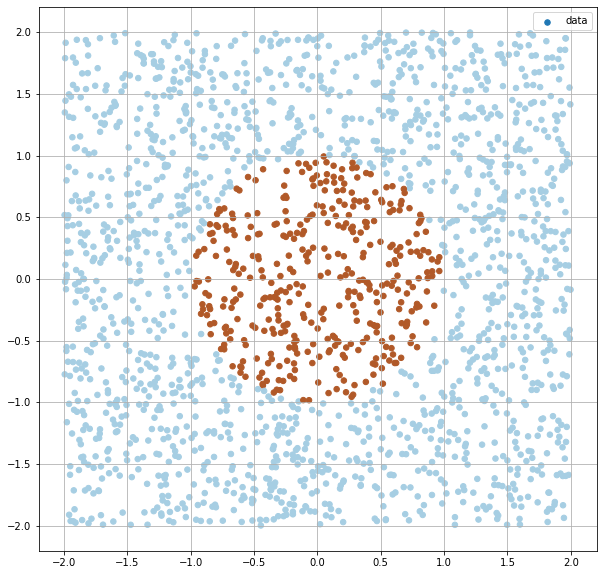

In [16]:
plot_binary(dataset)

In [17]:
model = SVC(kernel='rbf')

In [18]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

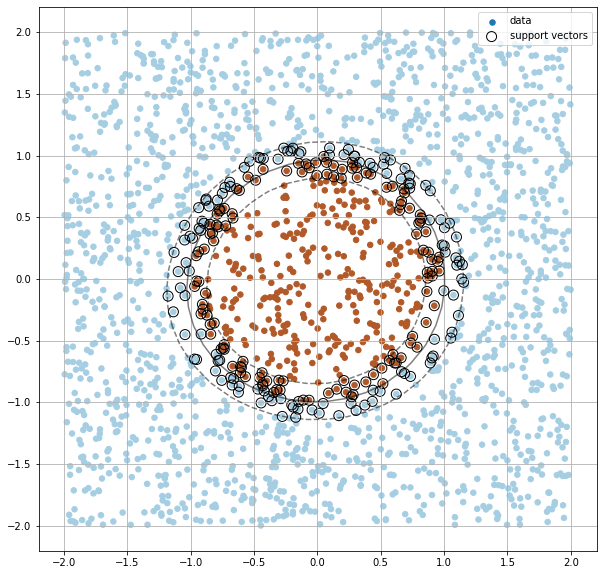

In [19]:
plot_binary(dataset, model)

In [21]:
dataset = generate_binary_dataset(-3, 3, 1000, lambda x, y: x ** 2 - y ** 2 < 1)
dataset.head()

x         y  target
0 -2.388200 -1.905574    -1.0
1 -0.427509 -2.804784     1.0
2 -1.544380  2.130838     1.0
3 -2.444884 -0.780738    -1.0
4 -0.255851  2.090300     1.0

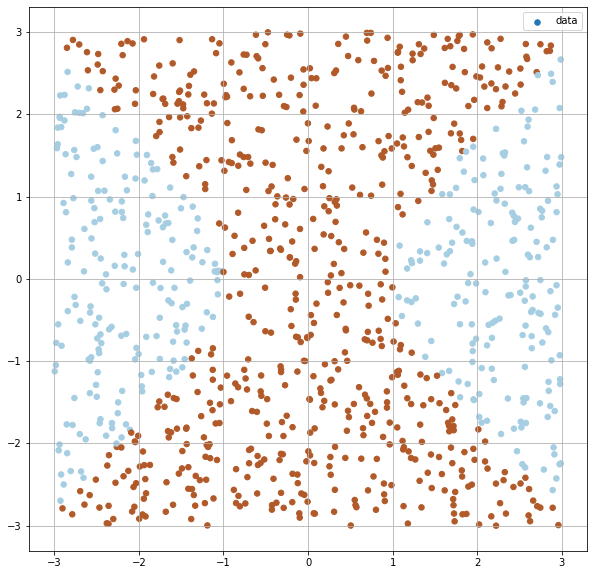

In [22]:
plot_binary(dataset)

In [23]:
model = SVC(kernel='rbf', C=10)

In [24]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

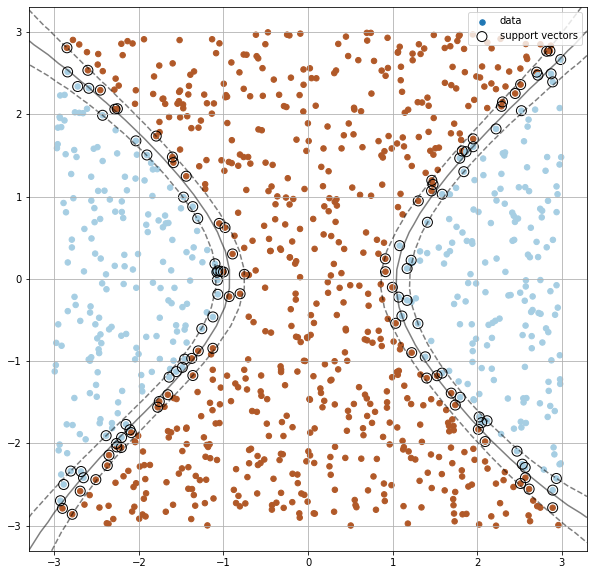

In [25]:
plot_binary(dataset, model)

In [26]:
dataset = generate_binary_dataset(-5, 5, 1000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 3))
dataset.head()

x         y  target
0 -2.429897 -1.452116     1.0
1  1.900090 -3.158947    -1.0
2 -2.587430  2.550011    -1.0
3 -4.488979  4.548741    -1.0
4 -4.896671 -4.593649    -1.0

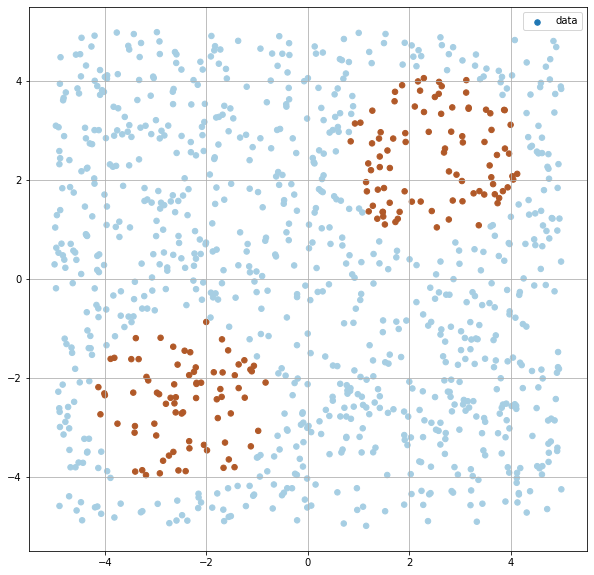

In [27]:
plot_binary(dataset)

In [28]:
model = SVC(kernel='rbf', tol=1e-11, C=5)

In [29]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-11, verbose=False)

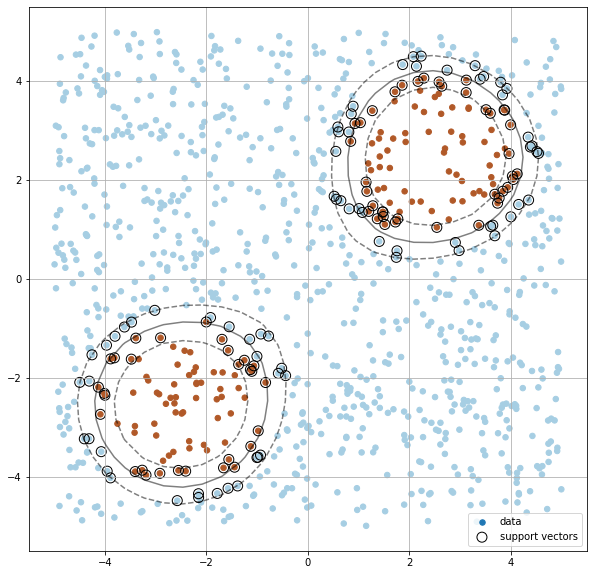

In [30]:
plot_binary(dataset, model)

In [31]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x - 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y - 2.5) ** 2 < 2.5))
dataset.head()

x         y  target
0 -0.792043  2.510236    -1.0
1  2.090714  2.948725     1.0
2  4.289544  2.375339    -1.0
3  1.663288  3.322442     1.0
4 -4.679161 -2.072914    -1.0

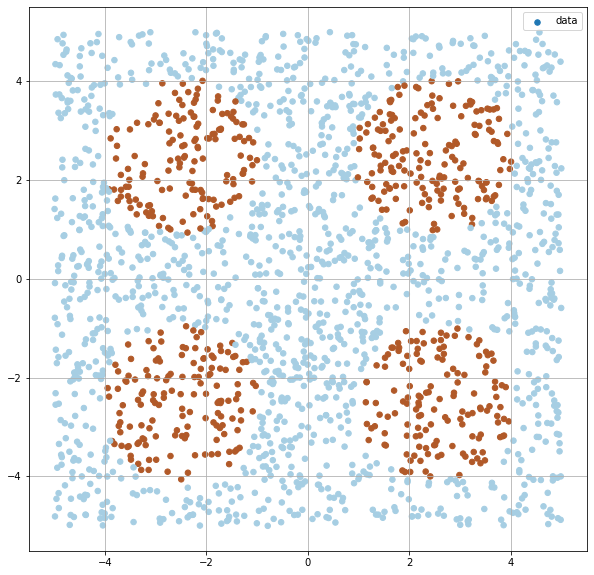

In [32]:
plot_binary(dataset)

In [39]:
model = SVC(kernel='rbf', tol=1e-12, C=10, gamma = 0.1)

In [40]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=False)

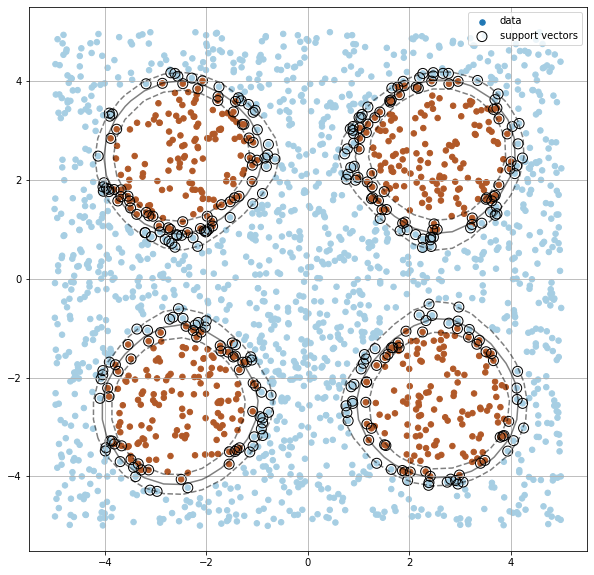

In [41]:
plot_binary(dataset, model)

In [42]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: np.abs(x - y) > 2)
dataset.head()

x         y  target
0 -0.352313  0.075367    -1.0
1  2.025659 -1.069105     1.0
2 -3.386137  4.702736     1.0
3  0.943739  0.201218    -1.0
4 -2.946682  1.032146     1.0

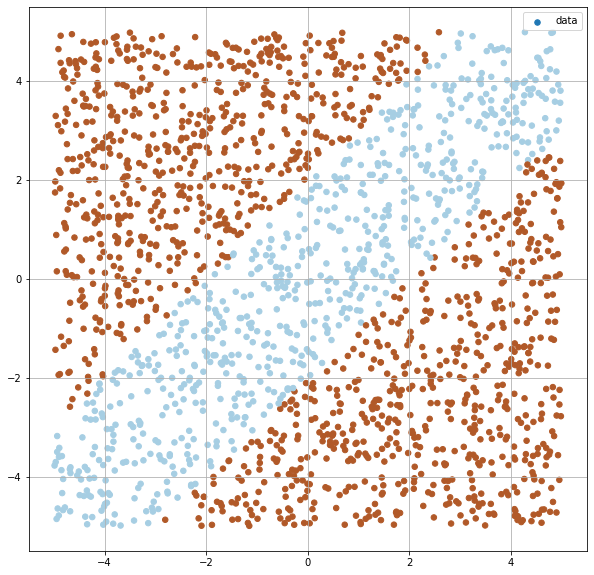

In [43]:
plot_binary(dataset)

In [44]:
model = SVC(kernel='poly', degree=2, tol=1e-3)

In [45]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

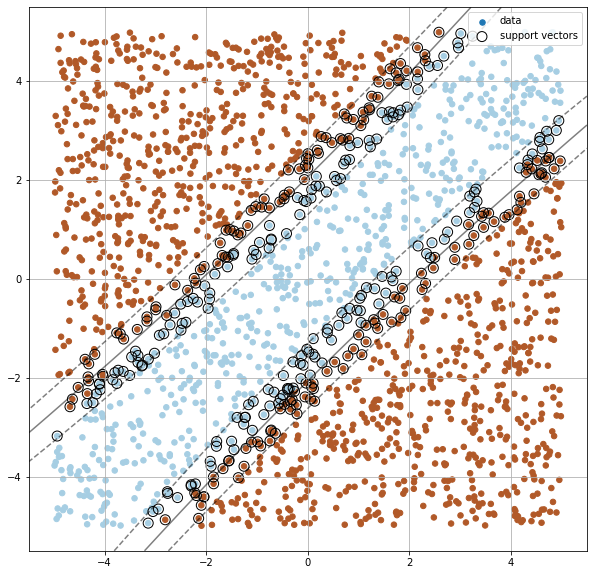

In [46]:
plot_binary(dataset, model)

In [47]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: x * y > 0)
dataset.head()

x         y  target
0 -0.043337  4.865999    -1.0
1  1.463672 -4.228023    -1.0
2  1.285029  3.967671     1.0
3 -1.985265  3.425911    -1.0
4  1.742248  3.743797     1.0

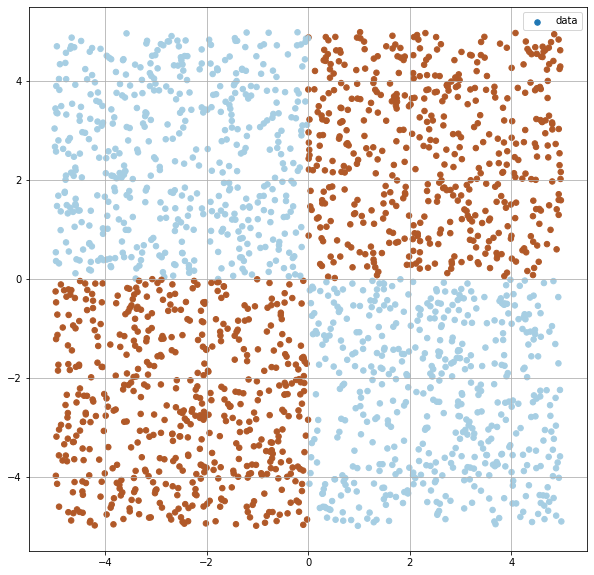

In [48]:
plot_binary(dataset)

In [49]:
model = SVC(kernel='poly', degree=2, tol=1e-7)

In [50]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-07, verbose=False)

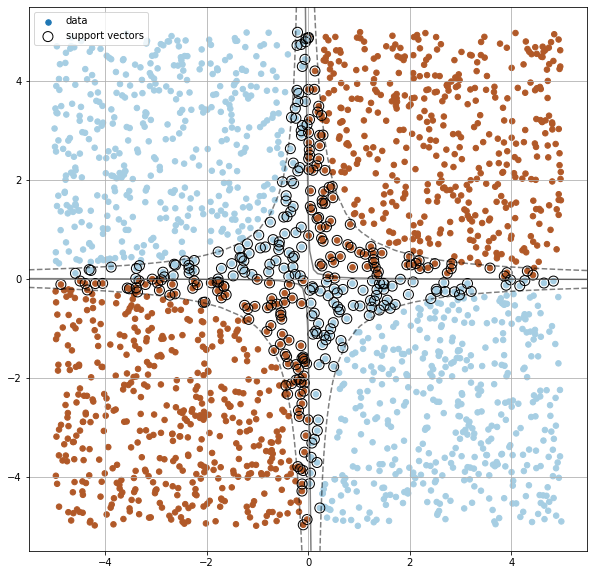

In [51]:
plot_binary(dataset, model)

In [76]:
dataset = generate_binary_dataset(-5, 5, 3000, lambda x, y: x * y * (np.abs(x) - np.abs(y)) > 0)
dataset.head()

x         y  target
0 -0.931750  1.616479     1.0
1 -1.468710  3.643872     1.0
2 -2.580950  2.541528    -1.0
3 -0.869679  4.103681     1.0
4 -2.396219 -1.072267     1.0

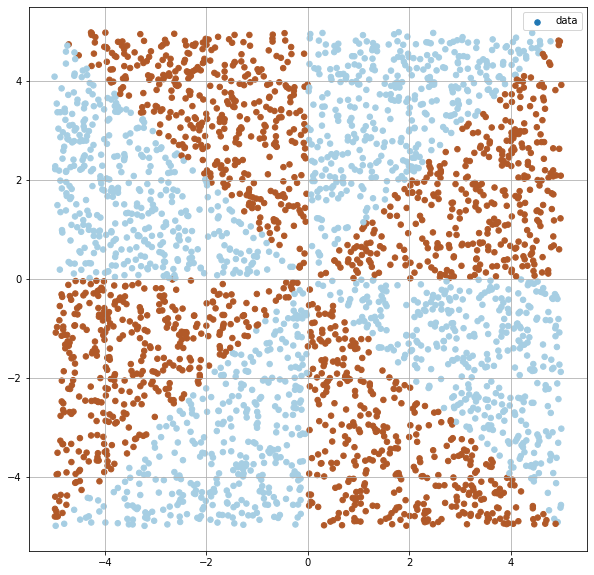

In [77]:
plot_binary(dataset)

In [78]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  

In [79]:
model_cv.fit(dataset[['x', 'y']], dataset.target)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed:    4.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [81]:
cv_results = pd.DataFrame(model_cv.cv_results_)

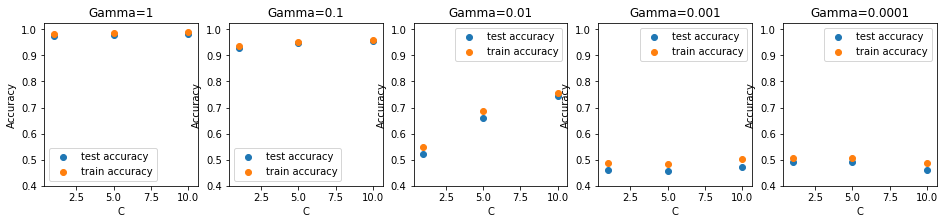

In [82]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,3))

for i in range(len(hyper_params[0]['gamma'])):
    plt.subplot(101 + 10 * len(hyper_params[0]['gamma']) + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.4, 1.025])

    plt.legend()

In [83]:
model_cv.best_score_

0.9806666666666667

In [84]:
model_cv.best_params_

{'C': 10, 'gamma': 1}

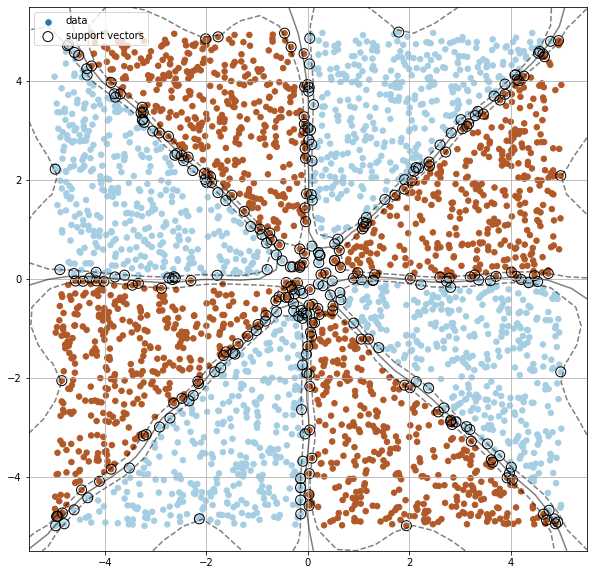

In [85]:
plot_binary(dataset, model_cv.best_estimator_)

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X = np.concatenate((X_train, X_test)).reshape(70000, 28 * 28).astype('float32') / 255
X.shape

(70000, 784)

In [30]:
y = np.concatenate((y_train, y_test)).reshape(70000)
y.shape

(70000,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=10)

#### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [9]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1e-1, 1e-2, 1e-3], 'C': [5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  

In [10]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 47.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [5, 10], 'gamma': [0.1, 0.01, 0.001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [11]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     964.752116      7.994060       110.300356        3.484812       5   
1     115.770053      3.147360        44.869843        1.621206       5   
2     130.169555      1.844809        48.775294        2.294158       5   
3     980.035708      9.344825       111.310754        8.011439      10   
4     117.066192      2.396389        48.741494        2.925210      10   
5     102.586465     10.381024        39.615658        7.903437      10   

  param_gamma                     params  split0_test_score  \
0         0.1     {'C': 5, 'gamma': 0.1}           0.893214   
1        0.01    {'C': 5, 'gamma': 0.01}           0.961786   
2       0.001   {'C': 5, 'gamma': 0.001}           0.928571   
3         0.1    {'C': 10, 'gamma': 0.1}           0.893214   
4        0.01   {'C': 10, 'gamma': 0.01}           0.963929   
5       0.001  {'C': 10, 'gamma': 0.001}           0.933571   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.896786           0.901429  ...         0.896857        0.004112   
1           0.968929           0.967143  ...         0.964714        0.002807   
2           0.933929           0.933929  ...         0.931143        0.002319   
3           0.896786           0.901429  ...         0.896857        0.004112   
4           0.967857           0.968214  ...         0.965500        0.002078   
5           0.941071           0.937500  ...         0.936143        0.002852   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            1.000000            1.000000   
1                2            0.998125            0.998214   
2                4            0.949196            0.946964   
3                5            1.000000            1.000000   
4                1            0.999643            0.999732   
5                3            0.957946            0.957500   

   split2_train_score  split3_train_score  split4_train_score  \
0            1.000000            1.000000            1.000000   
1            0.998214            0.997768            0.997946   
2            0.946964            0.947143            0.947232   
3            1.000000            1.000000            1.000000   
4            0.999643            0.999732            0.999732   
5            0.957857            0.957679            0.956696   

   mean_train_score  std_train_score  
0          1.000000         0.000000  
1          0.998054         0.000173  
2          0.947500         0.000855  
3          1.000000         0.000000  
4          0.999696         0.000044  
5          0.957536         0.000447  

[6 rows x 22 columns]

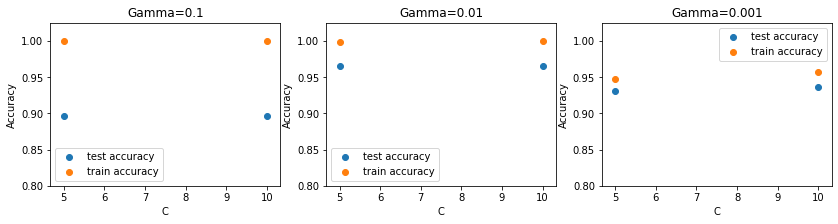

In [14]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(14,3))

for i in range(len(hyper_params[0]['gamma'])):
    plt.subplot(101 + 10 * len(hyper_params[0]['gamma']) + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.8, 1.025])

    plt.legend()

In [15]:
model_cv.best_score_

0.9655000000000001

In [25]:
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=10)

In [33]:
X_train.shape

(60000, 784)

In [35]:
model = OneVsRestClassifier(SVC(kernel='rbf', **model_cv.best_params_), n_jobs=8)

In [36]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.01, kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=8)

In [38]:
y_pred_train = model.predict(X_train)
metrics.accuracy_score(y_train, y_pred_train)

0.99945

In [39]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.986

In [40]:
def draw(images, texts, columns=1, rows=1, image_size=28, scale=4):
    fig = plt.figure(figsize=(scale * columns, scale * rows))

    for i in range(columns * rows):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(texts[i])
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(images[i].reshape(image_size, image_size) * 255)

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.show()

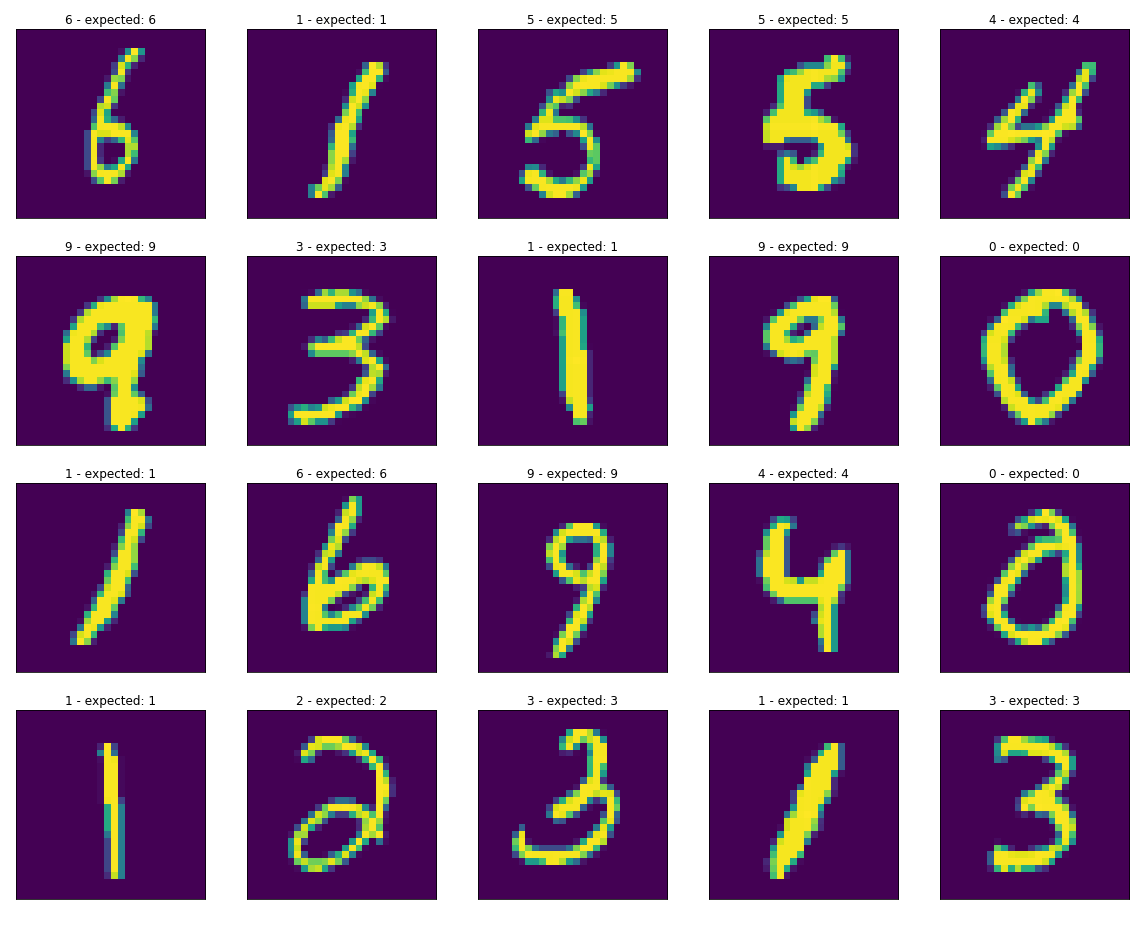

In [44]:
indices = np.random.choice(np.arange(len(X_test)), size=20)
images = X_test[indices]
predicted_digits = y_pred[indices]
texts = [f'{predicted_digits[i]} - expected: {y_test[indices[i]]}' for i in range(len(indices))]

draw(images, texts, 5, 4)

In [46]:
persianLPR = pd.read_csv('PersianLPR.csv')
persianLPR.head()

target  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      2      69      80      90      92      84      69      57      49   
1      2      78      92     120     135      92      50       0      28   
2      7      45      45      62      69      50      25      12       7   
3      3     117     120     123     122     118     117     117     120   
4      W      19      17      10      17      29      24      29      36   

   pixel8  ...  pixel246  pixel247  pixel248  pixel249  pixel250  pixel251  \
0      47  ...       139       135       116        86        55        39   
1      71  ...        78        85        85        78        64        57   
2       5  ...        69        79        84        79        62        52   
3     118  ...        90        72        33         5         0         2   
4      27  ...        80        49        27        22        15        17   

   pixel252  pixel253  pixel254  pixel255  
0        35        39        45        49  
1        50        57        57        85  
2        50        52        47        45  
3        12        15        13        17  
4        17        17        15        12  

[5 rows x 257 columns]

In [47]:
X = persianLPR.drop('target', axis=1).values.astype('float32') / 255
X.shape

(1500, 256)

In [48]:
y = persianLPR.target.values
y.shape

(1500,)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

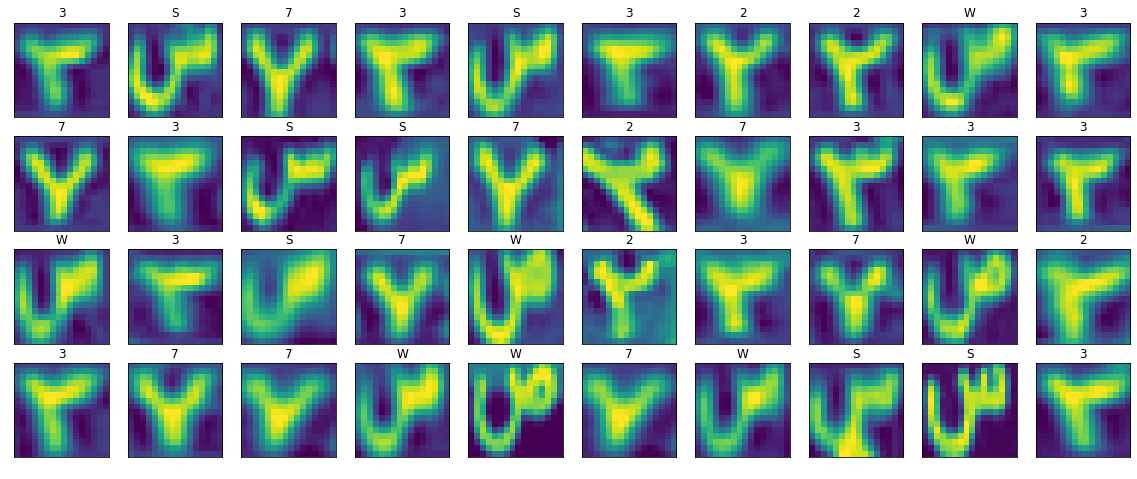

In [50]:
indices = np.random.choice(np.arange(len(X_train)), size=40)
images = X_train[indices]
labels = y_train[indices]

draw(images, labels, 10, 4, image_size=16, scale=2)

In [51]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)

In [52]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed:   25.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)

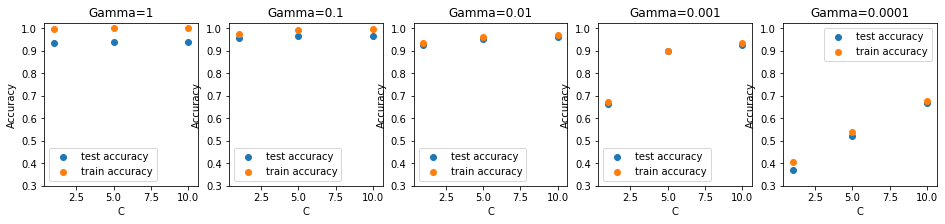

In [54]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,3))

for i in range(len(hyper_params[0]['gamma'])):
    plt.subplot(101 + 10 * len(hyper_params[0]['gamma']) + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.3, 1.025])

    plt.legend()

In [55]:
model_cv.best_score_

0.968148148148148

In [56]:
model_cv.best_params_

{'C': 10, 'gamma': 0.1}

In [57]:
model = SVC(kernel='rbf', **model_cv.best_params_)

In [58]:
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_pred_train = model.predict(X_train)
metrics.accuracy_score(y_train, y_pred_train)

0.9948148148148148

In [62]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9733333333333334

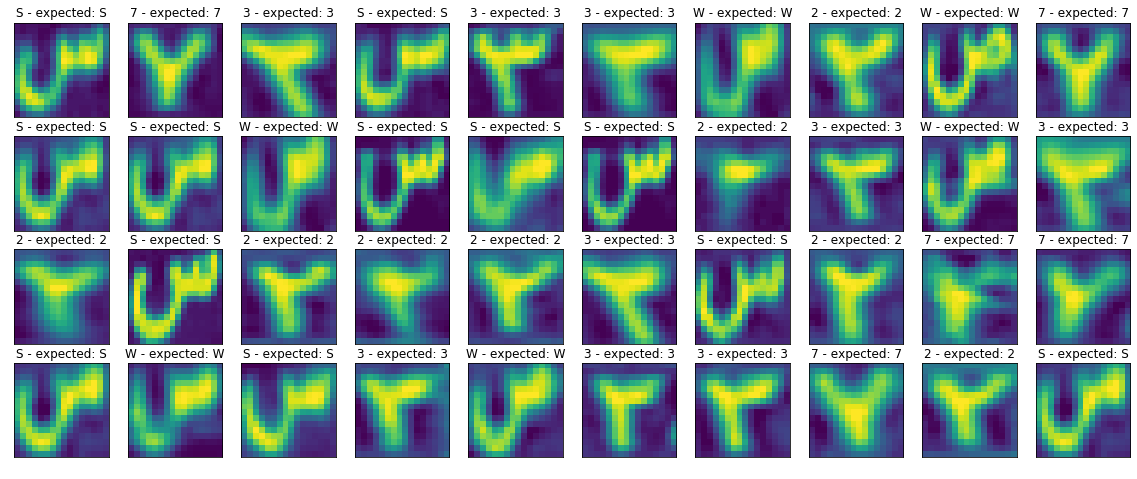

In [63]:
indices = np.random.choice(np.arange(len(X_test)), size=40)
images = X_test[indices]
predicted_digits = y_pred[indices]
texts = [f'{predicted_digits[i]} - expected: {y_test[indices[i]]}' for i in range(len(indices))]

draw(images, texts, 10, 4, image_size=16, scale=2)